# 1. Install and Import Dependencies

In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in indexes: https://download.pytorch.org/whl/cu117, https://pypi.ngc.nvidia.com
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [7]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [8]:
!cd yolov5 & pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'C:\Users\lisov\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


# 2. Load Model

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\lisov/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-9-12 Python-3.9.10 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [11]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [29]:
img = r'C:\Users\lisov\OneDrive\Рабочий стол\people.jpg'

In [30]:
results = model(img)
results.print()

image 1/1: 836x1254 5 persons
Speed: 37.0ms pre-process, 106.4ms inference, 19.0ms NMS per image at shape (1, 3, 448, 640)


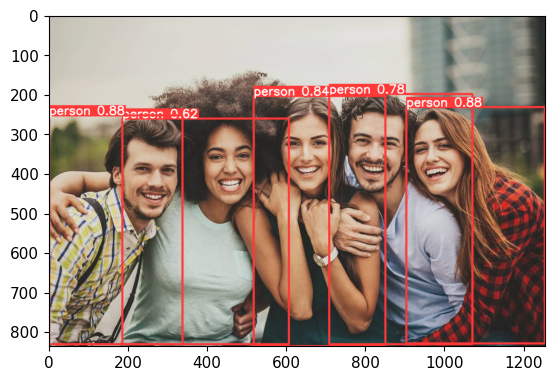

In [31]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [32]:
results.render()

[array([[[193, 189, 177],
         [193, 189, 177],
         [193, 189, 177],
         ...,
         [ 50,  51,  46],
         [ 51,  52,  47],
         [ 53,  54,  49]],
 
        [[193, 189, 177],
         [193, 189, 177],
         [193, 189, 177],
         ...,
         [ 50,  51,  46],
         [ 51,  52,  47],
         [ 53,  54,  49]],
 
        [[193, 189, 177],
         [193, 189, 177],
         [193, 189, 177],
         ...,
         [ 50,  51,  46],
         [ 51,  52,  47],
         [ 53,  54,  49]],
 
        ...,
 
        [[255,  56,  56],
         [255,  56,  56],
         [255,  56,  56],
         ...,
         [ 45,  37,  35],
         [ 45,  37,  35],
         [ 45,  37,  35]],
 
        [[205, 162, 120],
         [210, 129,  99],
         [203, 120,  95],
         ...,
         [ 45,  37,  35],
         [ 45,  37,  35],
         [ 45,  37,  35]],
 
        [[182, 182, 128],
         [172, 170, 119],
         [160, 155, 113],
         ...,
         [ 45,  37,  35],
  

# 4. Real Time Detections

In [34]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [12]:
import uuid   # Unique identifier
import os
import time

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [1]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'C:\Users\lisov\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


# 6. Load Custom Model

In [20]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\lisov/.cache\torch\hub\master.zip
YOLOv5  2023-9-14 Python-3.9.10 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [21]:
img = os.path.join('data', 'images', 'human5.jpg')

In [22]:
results = model(img)

In [23]:
results.print()

image 1/1: 1000x1000 1 kaska
Speed: 20.9ms pre-process, 133.6ms inference, 5.0ms NMS per image at shape (1, 3, 640, 640)


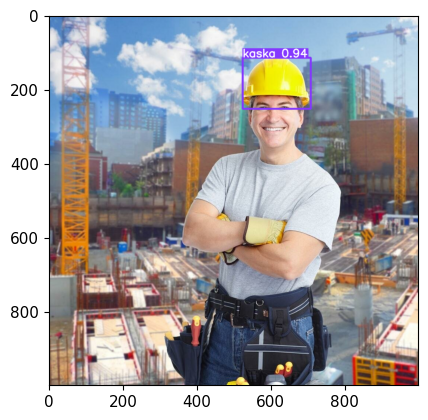

In [24]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()